<h1> Exploring dataset </h1>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
print('lib-s imported')

lib-s imported


In [3]:
df = pd.read_csv('large-data-NO-GIT/US_Accidents_June20.csv', nrows=10000)

In [4]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,10000.000000,10000.00000,10000.000000,10000.000000,0.0,0.0,10000.000000,2792.000000,9915.000000,1426.000000,9876.000000,9965.000000,9904.000000,8226.000000,1123.000000
mean,209.487200,2.39470,38.128680,-119.041084,NaN,NaN,0.021386,6475.279370,59.643732,33.126157,64.083131,30.012505,8.914297,8.860528,0.027720
std,20.115469,0.49126,0.749559,9.963780,NaN,NaN,0.397797,7171.055358,17.369289,10.297458,24.475341,0.316665,2.570054,4.592276,0.046018
min,200.000000,1.00000,36.352592,-123.810753,NaN,NaN,0.000000,1.000000,3.900000,-8.400000,8.000000,3.010000,0.200000,1.200000,0.000000
25%,201.000000,2.00000,37.643864,-122.159031,NaN,NaN,0.000000,1600.750000,48.200000,27.500000,46.000000,29.900000,10.000000,5.800000,0.000000
50%,201.000000,2.00000,37.959778,-121.875954,NaN,NaN,0.010000,4077.500000,57.000000,36.400000,67.000000,30.010000,10.000000,8.100000,0.010000
75%,201.000000,3.00000,38.574538,-121.349976,NaN,NaN,0.010000,8207.250000,71.100000,40.800000,86.000000,30.120000,10.000000,11.500000,0.040000
max,406.000000,4.00000,41.428753,-81.550728,NaN,NaN,24.040000,52664.000000,106.000000,66.000000,100.000000,30.620000,80.000000,33.400000,0.490000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     10000 non-null  object 
 1   Source                 10000 non-null  object 
 2   TMC                    10000 non-null  float64
 3   Severity               10000 non-null  int64  
 4   Start_Time             10000 non-null  object 
 5   End_Time               10000 non-null  object 
 6   Start_Lat              10000 non-null  float64
 7   Start_Lng              10000 non-null  float64
 8   End_Lat                0 non-null      float64
 9   End_Lng                0 non-null      float64
 10  Distance(mi)           10000 non-null  float64
 11  Description            10000 non-null  object 
 12  Number                 2792 non-null   float64
 13  Street                 10000 non-null  object 
 14  Side                   10000 non-null  object 
 15  Cit

In [7]:
corr = df.corr()

<AxesSubplot:>

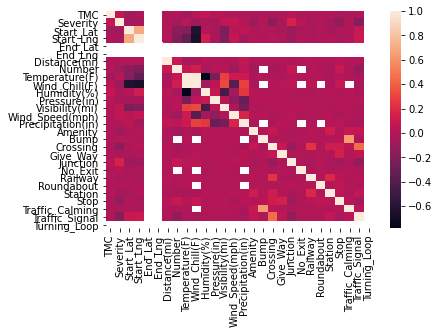

In [8]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [9]:
df.Weather_Condition.unique()


array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze'], dtype=object)

In [10]:
df.Weather_Condition.value_counts()


Clear                     5495
Overcast                  1403
Partly Cloudy              766
Mostly Cloudy              700
Light Rain                 677
Scattered Clouds           447
Haze                       134
Rain                       112
Light Snow                 110
Heavy Rain                  18
Fog                         15
Mist                        11
Light Freezing Drizzle      10
Snow                         7
Shallow Fog                  4
Light Drizzle                3
Light Freezing Fog           2
Patches of Fog               2
Smoke                        2
Drizzle                      1
Light Freezing Rain          1
Cloudy                       1
Light Haze                   1
Light Rain Showers           1
Name: Weather_Condition, dtype: int64

In [11]:
df_weather = df[['Severity',
       'Temperature(F)','Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Weather_Condition','Sunrise_Sunset','Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight']]

In [12]:
df_weather.describe(include='all')

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,10000.00000,9915.000000,9876.000000,9965.000000,9904.000000,8226.000000,9923,10000,10000,10000,10000
unique,NaN,NaN,NaN,NaN,NaN,NaN,24,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Clear,Day,Day,Day,Day
freq,NaN,NaN,NaN,NaN,NaN,NaN,5495,6031,6423,6741,7159
mean,2.39470,59.643732,64.083131,30.012505,8.914297,8.860528,NaN,NaN,NaN,NaN,NaN
std,0.49126,17.369289,24.475341,0.316665,2.570054,4.592276,NaN,NaN,NaN,NaN,NaN
min,1.00000,3.900000,8.000000,3.010000,0.200000,1.200000,NaN,NaN,NaN,NaN,NaN
25%,2.00000,48.200000,46.000000,29.900000,10.000000,5.800000,NaN,NaN,NaN,NaN,NaN
50%,2.00000,57.000000,67.000000,30.010000,10.000000,8.100000,NaN,NaN,NaN,NaN,NaN
75%,3.00000,71.100000,86.000000,30.120000,10.000000,11.500000,NaN,NaN,NaN,NaN,NaN


In [13]:
df1 = df_weather.dropna()

In [14]:
df1.describe(include='all')

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,8130.000000,8130.000000,8130.000000,8130.000000,8130.000000,8130.000000,8130,8130,8130,8130,8130
unique,NaN,NaN,NaN,NaN,NaN,NaN,24,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Clear,Day,Day,Day,Day
freq,NaN,NaN,NaN,NaN,NaN,NaN,4411,5234,5562,5817,6149
mean,2.409102,61.417552,61.979090,29.992839,8.954416,8.875867,NaN,NaN,NaN,NaN,NaN
std,0.494194,17.648860,24.774263,0.340245,2.552089,4.597504,NaN,NaN,NaN,NaN,NaN
min,1.000000,5.000000,8.000000,3.010000,0.200000,1.200000,NaN,NaN,NaN,NaN,NaN
25%,2.000000,50.000000,43.000000,29.890000,10.000000,5.800000,NaN,NaN,NaN,NaN,NaN
50%,2.000000,57.900000,64.000000,29.990000,10.000000,8.100000,NaN,NaN,NaN,NaN,NaN
75%,3.000000,73.400000,83.000000,30.100000,10.000000,11.500000,NaN,NaN,NaN,NaN,NaN


In [15]:
df2 = df1[['Severity',
       'Temperature(F)','Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)']]

In [16]:
df2.head()

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
2,2,36.0,100.0,29.67,10.0,3.5
3,3,35.1,96.0,29.64,9.0,4.6
4,2,36.0,89.0,29.65,6.0,3.5
5,3,37.9,97.0,29.63,7.0,3.5
6,2,34.0,100.0,29.66,7.0,3.5


In [17]:
from scipy import stats

df2 = df2[(np.abs(stats.zscore(df2)) < 3).all(axis=1)]

In [18]:
df2.describe(include='all')

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000
mean,2.408900,61.935140,61.160270,29.998229,9.106146,8.649433
std,0.492698,17.487838,24.554925,0.160416,2.090261,4.195286
min,1.000000,10.000000,8.000000,29.170000,1.500000,1.200000
25%,2.000000,50.000000,42.000000,29.890000,10.000000,5.800000
50%,2.000000,59.000000,63.000000,30.000000,10.000000,8.100000
75%,3.000000,73.900000,82.000000,30.100000,10.000000,11.500000
max,3.000000,106.000000,100.000000,30.620000,10.000000,21.900000


In [19]:
A = df2.values #returns an array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(A)

In [20]:
normalized_dataframe = pd.DataFrame(x_scaled)
normalized_dataframe.columns = ['Severity',
       'Temperature(F)','Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)']

In [21]:
normalized_dataframe.describe()

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000,7843.000000
mean,0.704450,0.540991,0.577829,0.571192,0.894841,0.359876
std,0.246349,0.182165,0.266901,0.110632,0.245913,0.202671
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.416667,0.369565,0.496552,1.000000,0.222222
50%,0.500000,0.510417,0.597826,0.572414,1.000000,0.333333
75%,1.000000,0.665625,0.804348,0.641379,1.000000,0.497585
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
normalized_dataframe.head()

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
0,0.5,0.270833,1.000000,0.344828,1.000000,0.111111
1,1.0,0.261458,0.956522,0.324138,0.882353,0.164251
2,0.5,0.270833,0.880435,0.331034,0.529412,0.111111
3,1.0,0.290625,0.967391,0.317241,0.647059,0.111111
4,0.5,0.250000,1.000000,0.337931,0.647059,0.111111


In [23]:
corr1 = normalized_dataframe.corr()

<AxesSubplot:>

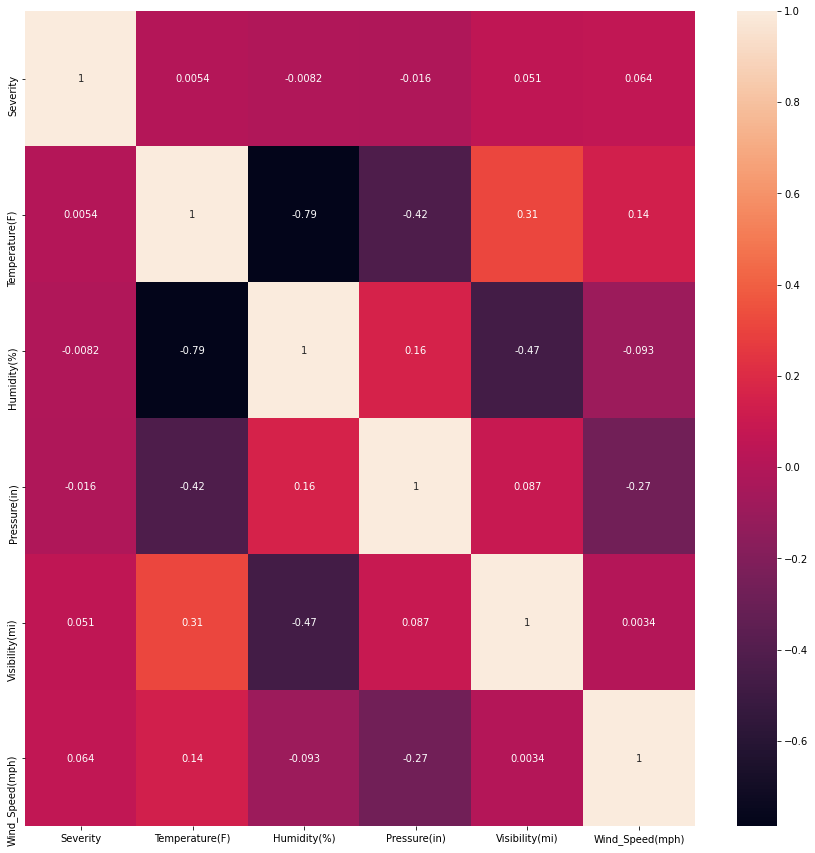

In [24]:
fig, ax = plt.subplots(figsize=(15,15))    
sns.heatmap(corr1, 
            xticklabels=corr1.columns,
            yticklabels=corr1.columns,
            annot=True )

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

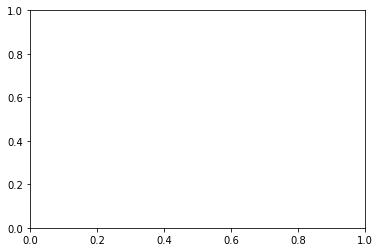

In [32]:
tips = sns.load_dataset("tips")
sns.kdeplot(data=df, x="Start_Time")

In [34]:
type(df.Start_Time)#need new column 

pandas.core.series.Series